# Exploratory Data Analysis
- This section conducts exploratory data analysis of the main dataset.
- I consider: age, sex, education, location, industry of work, and income

In [95]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as sm

import os
home = os.path.expanduser('~')

import sys; sys.path.append(home + '/github/access-to-financial-markets/src/')
import utils

In [96]:
raw     = home + '/Dropbox/data/mexico_fls/raw/2005/'
processed = home + '/Dropbox/data/mexico_fls/processed2/'

figs    = home + '/github/mfl/fig/'
dicts   = home + '/github/mfl/notebooks/dicts/'

In [97]:
df = pd.read_csv(processed + 'data.csv')
df.head(10)

,hhid,hhmember,weight_ind,is_hhm,age,attended_school,education,sex,income_type,income_undetailed,...,hh_has_savings_batch,hh_has_savings_person_not_hhm,hh_has_savings_afores,hh_has_savings_solidarity,hh_has_savings_at_house,hh_has_savings_other,hh_has_debts_12mth,hh_debts_12mth,hh_has_savings,weight
0,1000,1,2244.0,1.0,41.0,1.0,Medium,Male,dk,NaN,...,False,False,False,False,False,False,0.0,0.0,False,1908.0
1,3000,1,2244.0,1.0,45.0,0.0,Low,Male,undetailed,6000.0,...,False,False,False,False,False,False,0.0,0.0,False,1908.0
2,8000,1,2244.0,1.0,33.0,1.0,High,Male,undetailed,60000.0,...,False,False,False,False,False,False,1.0,15000.0,True,1908.0
3,11000,1,2074.0,1.0,29.0,1.0,Medium,Male,detailed,NaN,...,False,False,False,False,False,False,0.0,0.0,False,1763.0
4,12000,1,2074.0,1.0,46.0,1.0,Low,Male,undetailed,48000.0,...,False,False,False,False,False,False,0.0,0.0,True,1763.0
5,19000,1,1251.0,1.0,48.0,1.0,Low,Male,undetailed,64000.0,...,False,False,False,False,False,False,1.0,8000.0,False,1064.0
6,21000,1,1251.0,1.0,34.0,1.0,Medium,Male,undetailed,36000.0,...,False,False,False,False,False,False,1.0,140000.0,False,1064.0
7,23000,1,1251.0,1.0,59.0,1.0,Low,Male,NaN,NaN,...,False,False,False,False,False,False,0.0,0.0,False,1064.0
8,25000,1,1251.0,1.0,47.0,1.0,Low,Male,NaN,NaN,...,False,False,False,False,False,False,0.0,0.0,False,1064.0
9,26000,1,1251.0,1.0,58.0,1.0,Low,Male,NaN,NaN,...,False,False,False,False,True,False,0.0,0.0,True,1064.0


## Industry
- This section studies the industries that households work in
- The most common are agriculture, manufacturing, and construction
- The least common are utilities, communications, and finance/insurance

In [98]:
df.naics_classification.value_counts(dropna=False)

naics_classification
Agriculture                        744
Manufacturing                      455
Construction                       439
NaN                                347
Retail                             347
Other Services (Not Government)    248
Government                         191
Transportation                     187
Education                          166
Hospitality                        126
Other                              120
Business Services                   59
Professional / Scientific           51
Health / Social Services            44
Wholesale                           42
Mining                              39
Cultural / Sport / Recreational     30
Utilities                           19
Massive Means Information           19
Financial / Insurance               13
Real Estate                         12
Name: count, dtype: int64

In [99]:
size_industry = 100 * df.groupby('naics_classification')['weight'].sum() / df['weight'].sum()
size_industry = size_industry.sort_values(ascending=False)
size_industry

naics_classification
Agriculture                        16.241122
Manufacturing                      14.648564
Construction                       10.459530
Retail                              9.600970
Other Services (Not Government)     7.499611
Transportation                      5.525612
Government                          4.912521
Education                           4.837231
Other                               3.627953
Hospitality                         3.538192
Business Services                   1.952721
Professional / Scientific           1.639541
Health / Social Services            1.297335
Wholesale                           1.151088
Mining                              0.789374
Cultural / Sport / Recreational     0.776963
Real Estate                         0.684422
Utilities                           0.578926
Massive Means Information           0.533198
Financial / Insurance               0.503917
Name: weight, dtype: float64

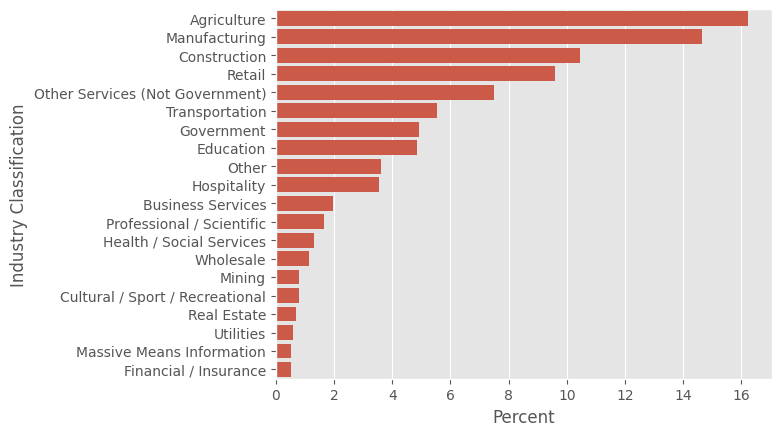

In [100]:
sns.barplot(y=size_industry.index, x=size_industry.values, 
            orient='h')
plt.xlabel('Percent')
plt.ylabel('Industry Classification');

## Sex
- This section studies the sex of the household head
- The majority of household heads are male

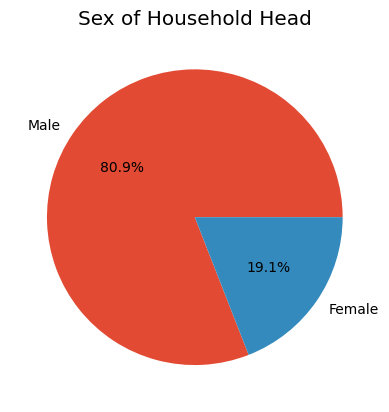

In [101]:
sex = df.sex.value_counts()
plt.pie(sex, labels=[x.title() for x in sex.index], autopct='%.1f%%')
plt.title('Sex of Household Head');

# Education
- This section studies the distribution of education
- The majority of households have a low education level, followed by the medium and high levels

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/286274809.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Low', 'Medium', 'High'])


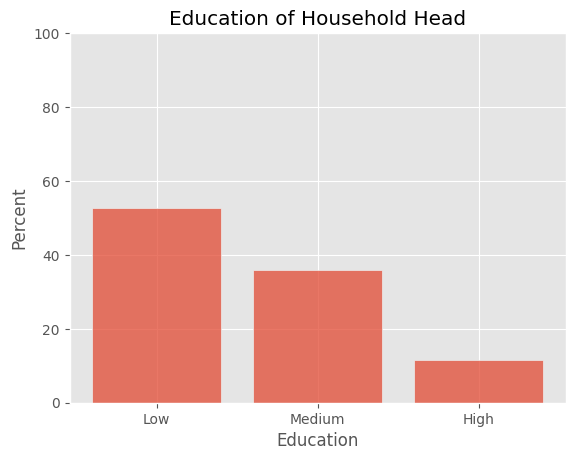

In [102]:
df['education'] = pd.Categorical(df['education'], ['Low', 'Medium', 'High']).reorder_categories(['Low', 'Medium', 'High'])
ax = sns.histplot(df, x='education',
                  weights='weight',
                  shrink=0.8,
                  stat='percent'
                  )
ax.set_xlabel('Education')
ax.set_xticklabels(['Low', 'Medium', 'High'])

ax.set_ylabel('Percent')
ax.set_ylim(0, 100)

ax.set_title('Education of Household Head');

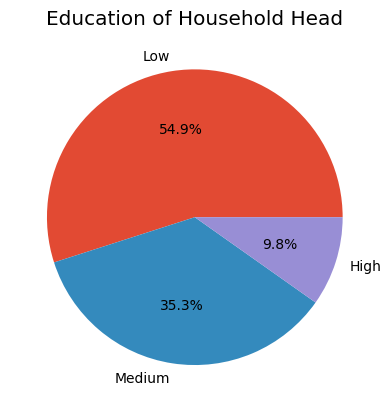

In [103]:
education = df.education.value_counts()
plt.pie(education, labels=[x.title() for x in education.index], autopct='%.1f%%')
plt.title('Education of Household Head');

## Interaction: Education and Sex of Household Head
- This section interacts the education and sex of the household head
- We can see that households with a high education level are slightly more likely to have a male household head

In [104]:
education_by_sex = 100 * pd.crosstab(df.education, df.sex, df.weight, aggfunc='sum', normalize='index')
education_by_sex.reset_index(inplace=True)
education_by_sex

sex,education,Female,Male
0,Low,23.475647,76.524353
1,Medium,16.404988,83.595012
2,High,17.685796,82.314204


In [105]:
education_by_sex = education_by_sex.melt(id_vars='education', value_name='Percent')
education_by_sex

,education,sex,Percent
0,Low,Female,23.475647
1,Medium,Female,16.404988
2,High,Female,17.685796
3,Low,Male,76.524353
4,Medium,Male,83.595012
5,High,Male,82.314204


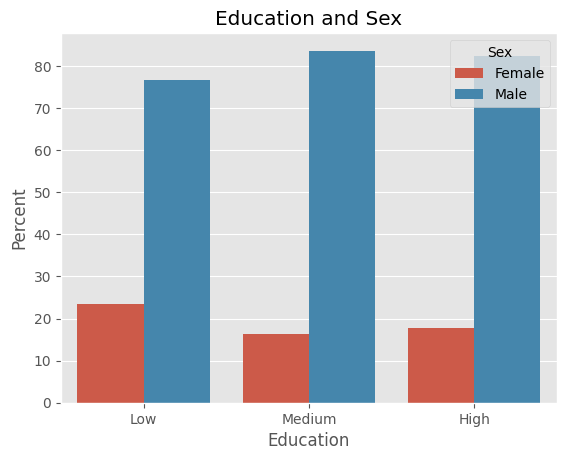

In [106]:
sns.barplot(education_by_sex, x='education', y='Percent', hue='sex')
plt.xlabel('Education')
plt.legend(title='Sex')
plt.title('Education and Sex');

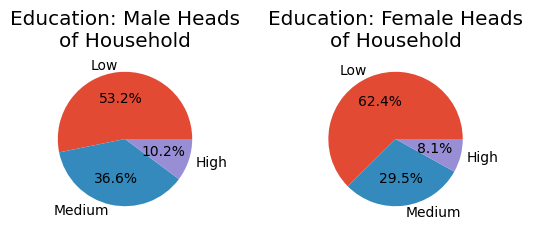

In [107]:
plt.subplot(221)
male = df.query("sex == 'Male'").education.value_counts()
plt.pie(male, labels=[x.title() for x in male.index], autopct='%.1f%%')
plt.title('Education: Male Heads\nof Household')

plt.subplot(222)
female = df.query("sex == 'Female'").education.value_counts()
plt.pie(female, labels=[x.title() for x in female.index], autopct='%.1f%%')
plt.title('Education: Female Heads\nof Household');

# Location
- This section studies the location of households
- Notably, this dataset does not cover every state in Mexico
- The most popular states are Veracruz, the State of Mexico, and Jalisco
- The least popular states are Durango, Sonora, and Baja California Sur

In [108]:
percent = 100 * df.groupby('state')['weight'].apply(np.sum) / df.weight.sum()
percent = percent.sort_values(ascending=False)
percent

state
Veravruz               11.742190
State of Mexico        10.826745
Jalisco                10.072409
Morelos                 8.074206
Michoacan               7.535243
Puebla                  6.830280
Oaxaca                  5.547959
Nuevo Leon              5.546475
Coahuila                5.424839
Federal District        5.390886
Guanajuato              5.290893
Yucatan                 5.101350
Sinaloa                 3.424499
Durango                 3.393675
Sonora                  3.077138
Baja California Sur     2.721215
Name: weight, dtype: float64

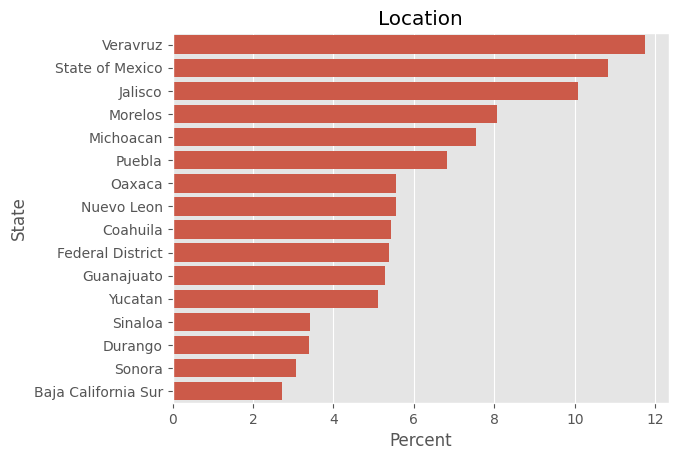

In [109]:
sns.barplot(x=percent.values, y=percent.index, orient='h')
plt.xlabel('Percent')
plt.ylabel('State')
plt.title('Location');

## Interaction: Education and Location
- This section studies the interaction of location and education
- We can see the states with the lowest level of education are Guanajuato, Veracruz, and Michoacan

In [110]:
state_by_education = 100 * pd.crosstab(df.state, df.education, df.weight, aggfunc='sum', normalize='index')
state_by_education

education,Low,Medium,High
state,,,
Baja California Sur,40.786444,46.065441,13.148114
Coahuila,32.222853,48.150892,19.626256
Durango,50.627387,33.646590,15.726023
Federal District,46.484027,28.872241,24.643732
Guanajuato,69.496221,27.704081,2.799698
Jalisco,51.173407,33.988373,14.838219
Michoacan,61.076659,30.853740,8.069601
Morelos,36.056790,46.131894,17.811316
Nuevo Leon,47.757818,43.388241,8.853941


In [111]:
state_by_education = state_by_education.reset_index().sort_values('Low', ascending=False).melt(id_vars='state', value_name='Percent')

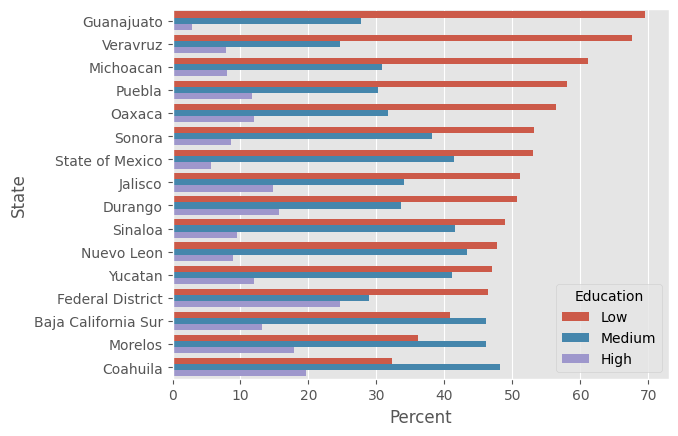

In [112]:
sns.barplot(state_by_education, x='Percent', y='state', hue='education')
plt.legend(title='Education')
plt.ylabel('State');
plt.xlabel('Percent');

# Age
- This section studies the distribution of the age of the household head

In [113]:
# Descriptive statistics
df['age'].describe()

count    3698.000000
mean       44.993780
std        10.414936
min        20.000000
25%        37.000000
50%        45.000000
75%        53.000000
max        65.000000
Name: age, dtype: float64

In [114]:
agebins = np.arange(20, 70, 5)
df['age_bin'] = pd.cut(df.age, agebins)

sizes = 100 * df.groupby('age_bin')['weight'].sum() / df['weight'].sum()
sizes = sizes.reset_index()
age_bin_labels = sizes.age_bin.apply(lambda x : str(x.left + 1) + ' - ' + str(x.right))
sizes

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/1521552731.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sizes = 100 * df.groupby('age_bin')['weight'].sum() / df['weight'].sum()


,age_bin,weight
0,"(20, 25]",1.945896
1,"(25, 30]",7.363961
2,"(30, 35]",13.303814
3,"(35, 40]",14.569926
4,"(40, 45]",16.111593
5,"(45, 50]",16.359326
6,"(50, 55]",12.289851
7,"(55, 60]",10.850364
8,"(60, 65]",7.062320


/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/4089771956.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_bin_labels, rotation=45)


Text(0.5, 1.0, 'Age of Household Head')

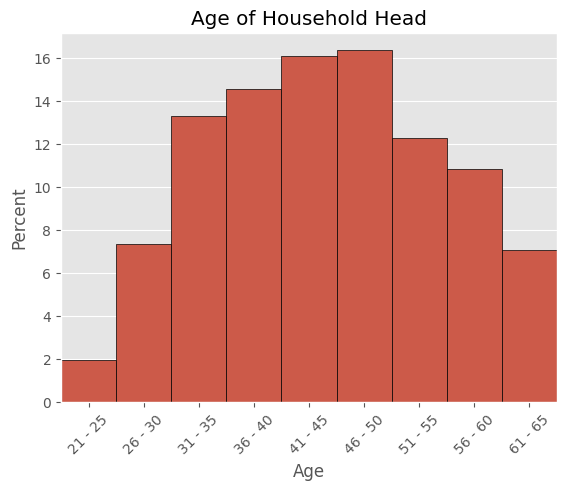

In [115]:
ax = sns.barplot(x=sizes.age_bin, y=sizes.weight, width=1.0, edgecolor='black')
ax.set_xticklabels(age_bin_labels, rotation=45)
ax.set_ylabel('Percent')
ax.set_xlabel('Age')
ax.set_title('Age of Household Head')


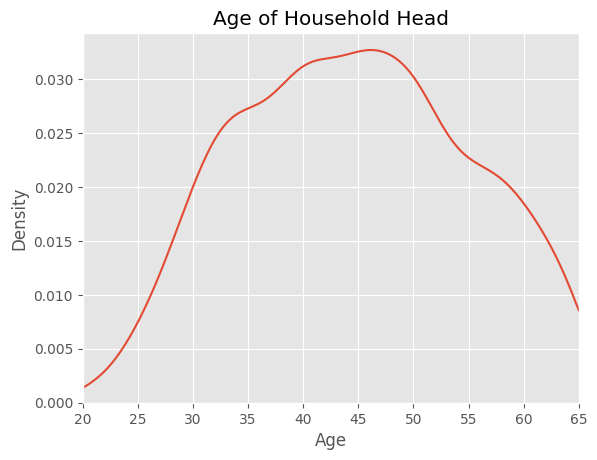

In [116]:
plt.clf()
ax = sns.kdeplot(df, x = 'age', weights='weight',
                 clip = (df.age.min(), df.age.max()),
            linestyle='-')
ax.set_xlim(df.age.min(), df.age.max())
ax.set_xlabel('Age')
plt.title('Age of Household Head')
plt.show()

In [117]:
crosstab = 100 * pd.crosstab(df.age_bin, df.education, df.weight, aggfunc='sum', normalize='index')
crosstab.reset_index(inplace=True)
age_by_education = crosstab.melt(id_vars='age_bin', value_name='Percent')
age_by_education

,age_bin,education,Percent
0,"(20, 25]",Low,25.386653
1,"(25, 30]",Low,33.996901
2,"(30, 35]",Low,32.120174
3,"(35, 40]",Low,36.251883
4,"(40, 45]",Low,47.135661
5,"(45, 50]",Low,60.194547
6,"(50, 55]",Low,68.515389
7,"(55, 60]",Low,76.982030
8,"(60, 65]",Low,81.426121
9,"(20, 25]",Medium,71.554977


## Interaction: Age and Education
- This section studies the interaction of age and education
- Here we can see that younger households have higher levels of education
- In fact, up to age 40, households are more likely to have a medium than low level of education

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/3375914135.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(age_bin_labels)


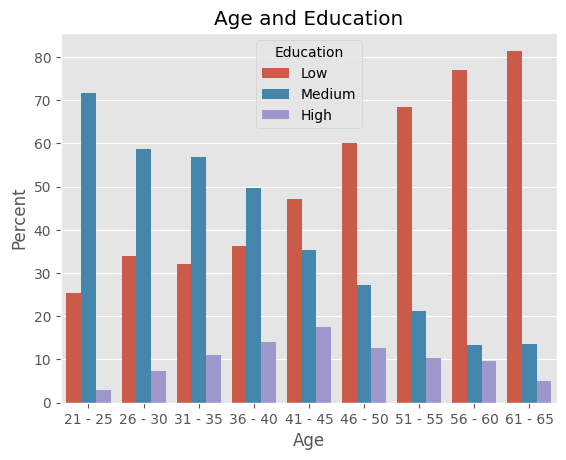

In [118]:
ax = sns.barplot(age_by_education, x='age_bin', y='Percent', hue='education')
ax.set_xticklabels(age_bin_labels)
ax.set_xlabel('Age')
ax.set_title('Age and Education')
ax.legend(title='Education')

# Income
- This section studies the distribution of income

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/2313551318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income,


Text(0.5, 1.0, 'Distribution of Income')

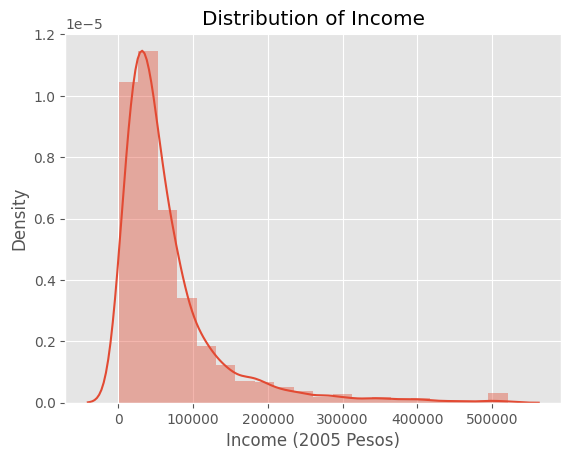

In [119]:
sns.distplot(df.income,
            bins=20, 
            hist_kws={'weights':df['weight']}
            )
plt.xlabel('Income (2005 Pesos)')
plt.title('Distribution of Income')

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/2592213254.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.income.transform(np.log),


Text(0.5, 1.0, 'Distribution of Log Income')

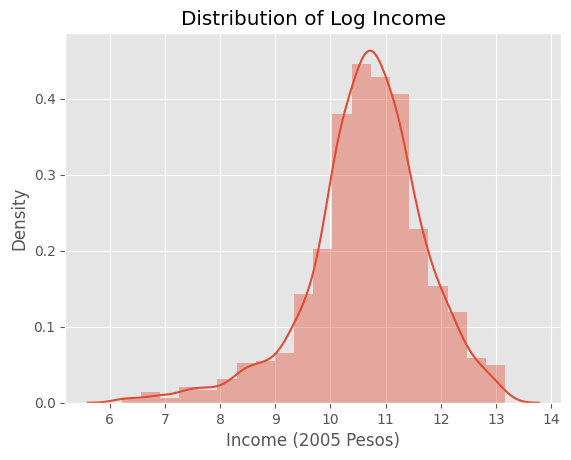

In [120]:
sns.distplot(df.income.transform(np.log),
            bins=20, 
            hist_kws={'weights':df['weight']}
            )
plt.xlabel('Income (2005 Pesos)')
plt.title('Distribution of Log Income')

## Interaction: Income, Sex, and Education
- This section characterizes the interaction of income with sex and education
- We observe that high income households have higher income, are more variation in the distribution of income
- Interestingly, low and medium education households with a male head earn more than female heads, but this reverses at a high level of education.

Text(0.5, 32.999999999999986, 'Income (2005 Pesos)')

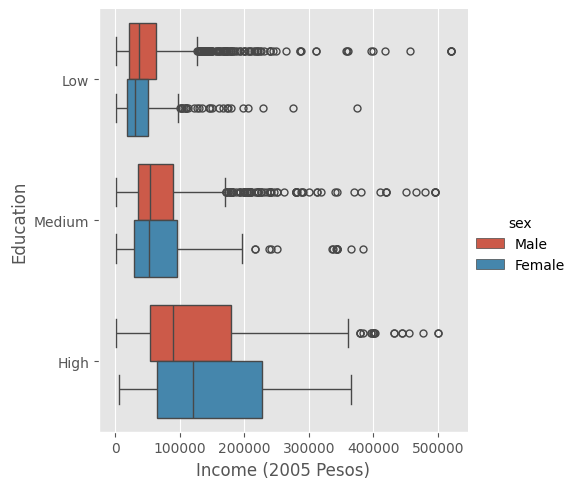

In [121]:
sns.catplot(df, x='income', y='education', hue='sex', kind='box', orient='h')
plt.ylabel('Education')
plt.xlabel('Income (2005 Pesos)')

## Interaction: Income and Location
- This section studies the interaction of income and location
- We can see that the distribution of income varies significantly with location

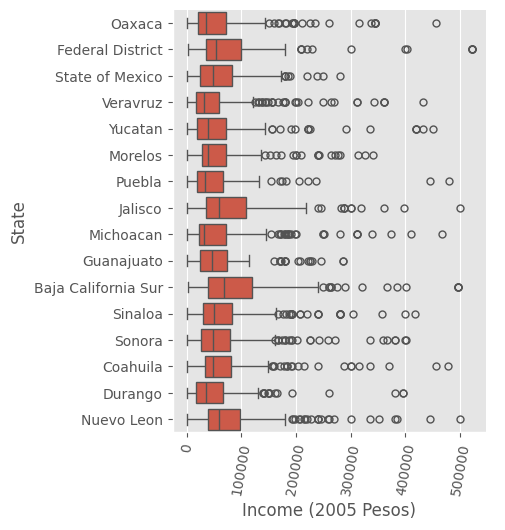

In [122]:
sns.catplot(df, x='income', y='state', kind='box', orient='h')
plt.xticks(rotation=80)

plt.ylabel('State')
plt.xlabel('Income (2005 Pesos)');

## Interaction: Income and Industry
- This section studies the interaction of income and industry
- Education, health/social services and finance/insurance earn the highest incomes
- Agriculture earns the lowest income

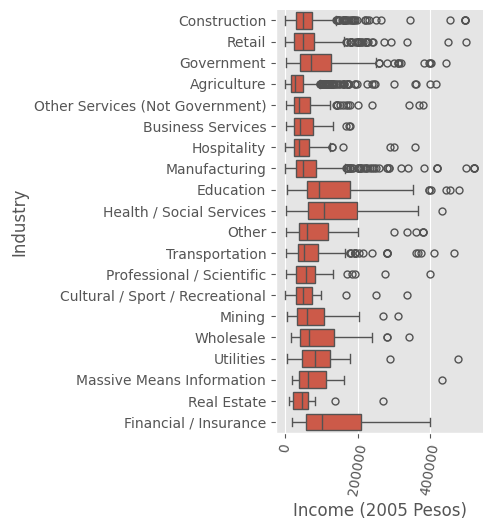

In [123]:
sns.catplot(df, x='income', y='naics_classification', kind='box', orient='h')
plt.xticks(rotation=80)

plt.ylabel('Industry')
plt.xlabel('Income (2005 Pesos)');

In [124]:
naics_by_education = 100 * pd.crosstab(df.naics_classification, df.education, df.weight, aggfunc='sum', normalize='index')
naics_by_education = naics_by_education.sort_values('Low', ascending=False).reset_index()
naics_by_education = naics_by_education.melt(id_vars='naics_classification', var_name='education', value_name='Percent')
naics_by_education

,naics_classification,education,Percent
0,Agriculture,Low,84.425531
1,Construction,Low,64.333170
2,Other Services (Not Government),Low,56.747555
3,Business Services,Low,54.178407
4,Hospitality,Low,52.049080
5,Retail,Low,47.694989
6,Manufacturing,Low,46.830718
7,Real Estate,Low,42.429985
8,Massive Means Information,Low,41.489785
9,Other,Low,38.167666


## Interaction: Industry and Education
- This section studies the interaction of industry and education
- Agriculture, construction, and other services have the lowest levels of education.
- Education, health/social services and financial/insurance have the highest levels of education.

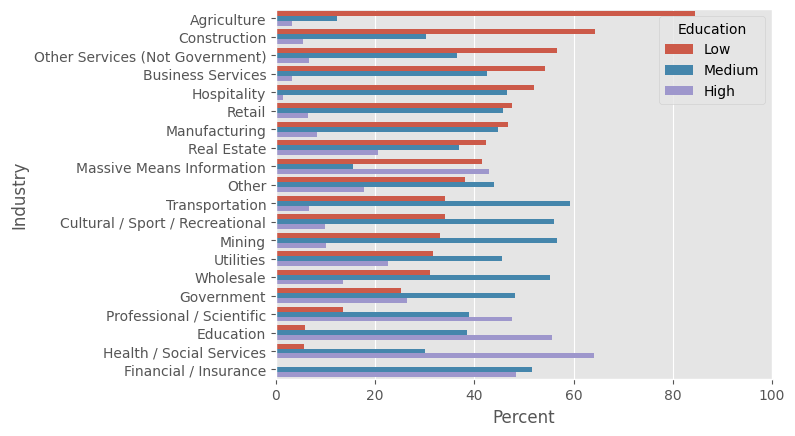

In [125]:
sns.barplot(naics_by_education, y='naics_classification', x='Percent', orient='h', hue='education')
plt.ylabel('Industry')
plt.legend(title='Education')
plt.xlim(0, 100);

# Savings

In [126]:
hh_savings = [x for x in df.columns if 'hh_has_savings' in x]

def weighted_mean(df, x, weight='weight'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    
hh_savings_mean = pd.DataFrame(
    index = hh_savings
)
hh_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in hh_savings]
hh_savings_mean.sort_values('mean', ascending=False)

,mean
hh_has_savings,16.276118
hh_has_savings_bank,9.302160
hh_has_savings_credit_institution,3.747139
hh_has_savings_at_house,1.803693
hh_has_savings_other,0.962190
hh_has_savings_cooperative,0.573170
hh_has_savings_afores,0.221367
hh_has_savings_batch,0.216204
hh_has_savings_solidarity,0.116457
hh_has_savings_person_not_hhm,0.088074


In [127]:
ind_savings = [x for x in df.columns if 'has_savings' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

ind_savings_mean = pd.DataFrame(
    index = ind_savings
)
ind_savings_mean['mean'] = [100 * weighted_mean(df, x) for x in ind_savings]
ind_savings_mean.sort_values('mean', ascending=False)

,mean
has_savings,25.368582
hh_has_savings,16.352482
has_savings_bank,11.775829
hh_has_savings_bank,9.363142
has_savings_savingsbank,6.295236
has_savings_house,6.043343
hh_has_savings_credit_institution,3.764116
hh_has_savings_at_house,1.799965
has_savings_coop,1.549393
has_savings_none,1.023548


## Durable Assets
- This section studies possession of durable assets, such as housing, appliances, etc
- The vast majority of households own electronics and domestic appliances
- For transportation, about half of households own bicycles and less than 40% own a vehicle
- A significant minority own animals such as poultry, pigs, etc.

In [128]:
own = [x for x in df.columns if 'own' in x]

def weighted_mean(df, x, weight='weight_ind'):
    return np.sum(df[x] * df[weight]) / np.sum(df[weight])
    

own_mean = pd.DataFrame(
    index = own
)
own_mean['mean'] = [100 * weighted_mean(df, x) for x in own]
own_mean = own_mean.sort_values('mean', ascending=False)
own_mean

,mean
own_electronics,94.718244
own_washmachinestove,89.533155
own_domesticappliance,88.642239
own_house,78.180325
own_bicycles,49.382515
own_vehicle,39.008476
own_otherhouse,17.242378
own_financialassets,16.463443
own_poultry,13.122686
own_pigsgoats,4.406368


In [129]:
labels = {
    x: x.replace('own_', '').title()
    for x in own_mean.index
}
labels

{'own_electronics': 'Electronics',
 'own_washmachinestove': 'Washmachinestove',
 'own_domesticappliance': 'Domesticappliance',
 'own_house': 'House',
 'own_bicycles': 'Bicycles',
 'own_vehicle': 'Vehicle',
 'own_otherhouse': 'Otherhouse',
 'own_financialassets': 'Financialassets',
 'own_poultry': 'Poultry',
 'own_pigsgoats': 'Pigsgoats',
 'own_horsesmules': 'Horsesmules',
 'own_bullcow': 'Bullcow',
 'own_machinary': 'Machinary',
 'own_otherassets': 'Otherassets'}

/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_11983/202483765.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([labels[x] for x in own_mean.index])


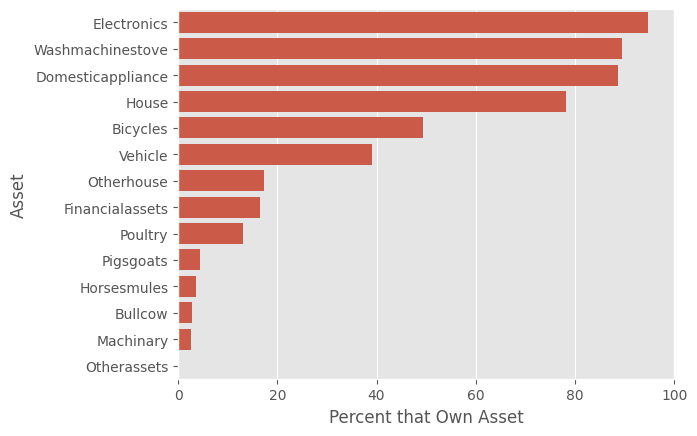

In [130]:
ax = sns.barplot(own_mean, y=own_mean.index, x='mean')
ax.set_yticklabels([labels[x] for x in own_mean.index])
ax.set_ylabel('Asset')

ax.set_xlim(0, 100)
ax.set_xlabel('Percent that Own Asset');